# Fancy Indexing -Arrays of indices
![](https://scipy-lectures.org/_images/numpy_fancy_indexing.png)
![](https://scipy-lectures.org/_images/numpy_indexing.png)

## Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

Alternatively, we can pass a single list or array of indices to obtain the same result:

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

## **The shape of the result reflects the shape of the *index arrays*** rather than the shape of the *array being indexed*:

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

## Fancy indexing in multiple dimensions

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### The first index refers to the row, and the second to the column:
### The first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

## Combined Indexing
### Combine Fancy indexing with the other indexing schemes:

In [7]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can combine fancy and simple indices:

In [8]:
X[2, [2, 0, 1]]

array([10,  8,  9])

We can also combine fancy indexing with slicing:

In [9]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

### Combine fancy indexing with masking:

In [10]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [11]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

Using the plotting tools we will discuss in Section for Data Visualization, we can visualize these points as a scatter-plot:

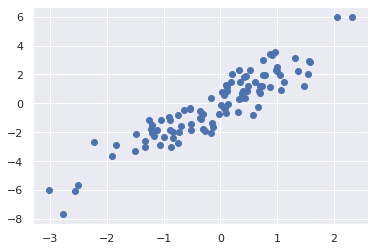

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 30 random points. We'll do this by first choosing 30 random indices with no repeats, and use these indices to select a portion of the original array:

In [13]:
indices = np.random.choice(X.shape[0], 30, replace=False)
indices

array([55, 28, 12,  4, 77, 35, 63,  0, 52, 29, 54,  8, 87, 47, 97, 65, 51,
       10, 38, 13, 34, 81, 19, 67, 88, 40, 44, 27, 61, 22])

In [14]:
selection = X[indices]  # fancy indexing here
selection.shape

(30, 2)

Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

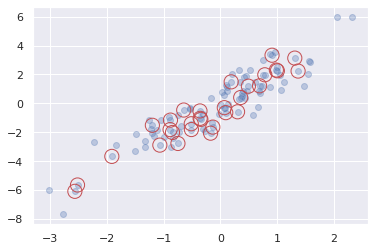

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], color='r',
            facecolor='none', s=200);

This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models, and in sampling approaches to answering statistical questions.